## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter 005 Example 001C

In [1]:
sfeature=['F02', 'F04']

## Part A - Load Libraries

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

## Part B - Load the Roses dataset

In [3]:
fileName = '../../Data/Roses02.csv'
fileFullName = os.path.abspath(fileName)
print(fileFullName)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrial Machine Learning\book\GitHub\Upload\industrial-machine-learning\Data\Roses02.csv


In [4]:
datadf= pd.read_csv(fileFullName, header=0)
print(datadf.shape)
print(datadf.columns)

(600, 6)
Index(['F01', 'F02', 'F03', 'F04', 'T01', 'T02'], dtype='object')


In [5]:
data_X = datadf[sfeature].copy(deep=True)

In [6]:
data_X2 = np.array(data_X,dtype='float64')

In [7]:
data_y = datadf['T01'].copy(deep=True)
data_y.columns = (['T'])

In [8]:
data_y2 = np.array(data_y,dtype='int')

## Part C - Select Training and Test Data Sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data_X2, data_y2, train_size=0.7, test_size=0.3, random_state=50)

## Part D - Build Scaler

In [10]:
transformer = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler = transformer.fit(X_train, y_train)

In [11]:
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)
print(X_train[0],X_train_scale[0])

[3.395 0.152] [ 0.75072905 -1.39484395]


In [12]:
print(scaler.get_params(deep=True))

{'copy': True, 'with_mean': True, 'with_std': True}


In [13]:
s=np.array(scaler.scale_)
print('Features:', s.shape[0])
print('Samples:', scaler.n_samples_seen_)
print('Scale:', scaler.scale_)
print('Mean:',scaler.mean_ )
print('variance:',scaler.var_)

Features: 2
Samples: 420
Scale: [0.43103497 0.76623352]
Mean: [3.07140952 1.22077619]
variance: [0.18579115 0.58711381]


## Part E - Build Base ML using Support Vector Classification (SVC) algorithm

In [14]:
svc=SVC(max_iter=5000, 
        gamma='auto', 
        class_weight='balanced', 
        probability=True, 
        kernel='linear', 
        random_state=0, 
        verbose=False)

## Part F - Execute AdaBoost = 1

In [15]:
clf1 = AdaBoostClassifier(algorithm='SAMME', 
                          n_estimators=1, 
                          base_estimator=svc, 
                          learning_rate=1, 
                          random_state=0)

clf1.fit(X_train_scale, y_train)

score1 = clf1.score(X_test_scale,y_test)

In [16]:
for i in range(clf1.n_classes_):
    print('Class: %3d > %s' % (i, clf1.classes_[i]))

Class:   0 > 1
Class:   1 > 2
Class:   2 > 3


In [17]:
for i in range(len(clf1.estimator_weights_)):
    print('Estimator %03d > weight: %7.5f and error: %7.5f' % ((i+1), clf1.estimator_weights_[i],clf1.estimator_errors_[i]))

Estimator 001 > weight: 1.41861 and error: 0.32619


In [18]:
print('Results for AdaBoost (1): %7.4f %%' % (score1*100))

Results for AdaBoost (1): 69.4444 %


## Part G - Execute AdaBoost = 5

In [19]:
clf2 = AdaBoostClassifier(algorithm='SAMME', n_estimators=5, base_estimator=svc, learning_rate=1, random_state=0)
clf2.fit(X_train_scale, y_train)
score2 = clf2.score(X_test_scale,y_test)

In [20]:
for i in range(len(clf2.estimator_weights_)):
    print('Estimator %03d > weight: %7.5f and error: %7.5f' % ((i+1), clf2.estimator_weights_[i],clf2.estimator_errors_[i]))

Estimator 001 > weight: 1.41861 and error: 0.32619
Estimator 002 > weight: 1.36309 and error: 0.33851
Estimator 003 > weight: 1.32739 and error: 0.34655
Estimator 004 > weight: 1.79072 and error: 0.25020
Estimator 005 > weight: 0.50491 and error: 0.54692


In [21]:
print('Results for AdaBoost (5): %7.4f %%'% (score2*100))

Results for AdaBoost (5): 69.4444 %


## Part H - Execute AdaBoost = 10

In [22]:
clf3 = AdaBoostClassifier(algorithm='SAMME', n_estimators=10, base_estimator=svc, learning_rate=1, random_state=0)
clf3.fit(X_train_scale, y_train)
score3 = clf3.score(X_test_scale,y_test)

In [23]:
for i in range(len(clf3.estimator_weights_)):
    print('Estimator %03d > weight: %7.5f and error: %7.5f' % ((i+1), clf3.estimator_weights_[i],clf3.estimator_errors_[i]))

Estimator 001 > weight: 1.41861 and error: 0.32619
Estimator 002 > weight: 1.36309 and error: 0.33851
Estimator 003 > weight: 1.32739 and error: 0.34655
Estimator 004 > weight: 1.79072 and error: 0.25020
Estimator 005 > weight: 0.50491 and error: 0.54692
Estimator 006 > weight: 1.37543 and error: 0.33575
Estimator 007 > weight: 1.36476 and error: 0.33813
Estimator 008 > weight: 1.34399 and error: 0.34280
Estimator 009 > weight: 1.30453 and error: 0.35174
Estimator 010 > weight: 1.38629 and error: 0.33333


In [24]:
print('Results for AdaBoost (10): %7.5f %%'% (score3*100))

Results for AdaBoost (10): 82.22222 %


## Part I - Execute AdaBoost = 20

In [25]:
clf4 = AdaBoostClassifier(algorithm='SAMME', n_estimators=20, base_estimator=svc, learning_rate=1, random_state=0)
clf4.fit(X_train_scale, y_train)
score4 = clf4.score(X_test_scale,y_test)

In [26]:
for i in range(len(clf4.estimator_weights_)):
    print('Estimator %03d > weight: %7.5f and error: %7.5f' % ((i+1), clf4.estimator_weights_[i],clf4.estimator_errors_[i]))

Estimator 001 > weight: 1.41861 and error: 0.32619
Estimator 002 > weight: 1.36309 and error: 0.33851
Estimator 003 > weight: 1.32739 and error: 0.34655
Estimator 004 > weight: 1.79072 and error: 0.25020
Estimator 005 > weight: 0.50491 and error: 0.54692
Estimator 006 > weight: 1.37543 and error: 0.33575
Estimator 007 > weight: 1.36476 and error: 0.33813
Estimator 008 > weight: 1.34399 and error: 0.34280
Estimator 009 > weight: 1.30453 and error: 0.35174
Estimator 010 > weight: 1.38629 and error: 0.33333
Estimator 011 > weight: 1.38629 and error: 0.33333
Estimator 012 > weight: 1.38629 and error: 0.33333
Estimator 013 > weight: 1.38629 and error: 0.33333
Estimator 014 > weight: 1.38629 and error: 0.33333
Estimator 015 > weight: 1.38629 and error: 0.33333
Estimator 016 > weight: 1.38629 and error: 0.33333
Estimator 017 > weight: 1.38629 and error: 0.33333
Estimator 018 > weight: 1.38629 and error: 0.33333
Estimator 019 > weight: 1.38629 and error: 0.33333
Estimator 020 > weight: 1.38629

In [27]:
print('Results for AdaBoost (30): %7.4f %%'% (score4*100))

Results for AdaBoost (30): 82.2222 %


## Part J - Improvement Analysis

In [28]:
s1=round(score1,4)
s2=round(score2,4)
print('Score improvement 1 to 5 (%5.3f %% to %5.3f %%), so a %5.3f %% improvement!' % (s1*100,s2*100,((s2-s1)/s1)*100))

Score improvement 1 to 5 (69.440 % to 69.440 %), so a 0.000 % improvement!


In [29]:
s1=round(score1,4)
s3=round(score3,4)
print('Score improvement 1 to 10 (%5.3f %% to %5.3f %%), so a %5.3f %% improvement!' % (s1*100,s3*100,((s3-s1)/s1)*100))

Score improvement 1 to 10 (69.440 % to 82.220 %), so a 18.404 % improvement!


In [30]:
s1=round(score1,4)
s4=round(score4,4)
print('Score improvement  1 to 30 (%5.3f %% to %5.3f %%), so a %5.3f %% improvement!' % (s1*100,s4*100,((s4-s1)/s1)*100))

Score improvement  1 to 30 (69.440 % to 82.220 %), so a 18.404 % improvement!


## Part K -  Plot Test Results

In [31]:
X=X_test_scale
Y=y_test

In [32]:
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

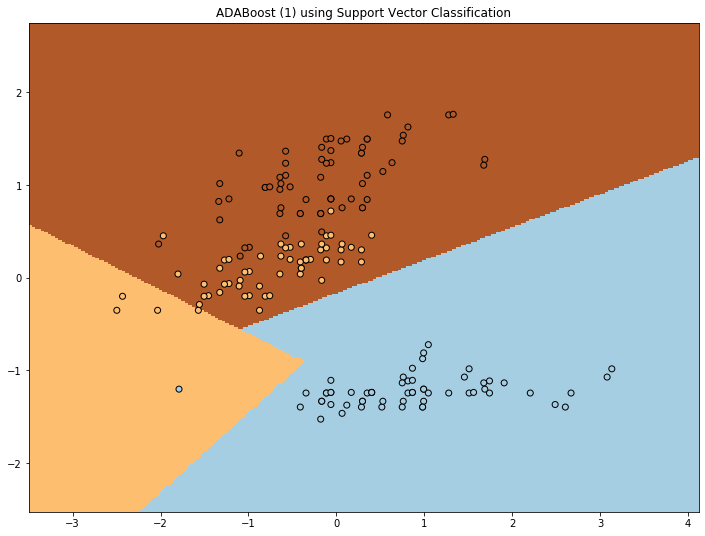

In [33]:
Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig1 = plt.figure(figsize=(12, 9))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('ADABoost (1) using Support Vector Classification')
plt.axis('tight')
plt.show()

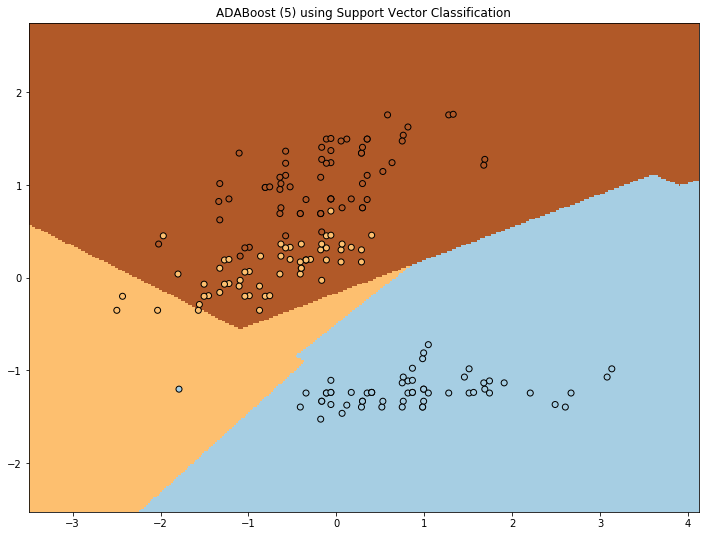

In [34]:
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig2 = plt.figure(figsize=(12, 9))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('ADABoost (5) using Support Vector Classification')
plt.axis('tight')
plt.show()

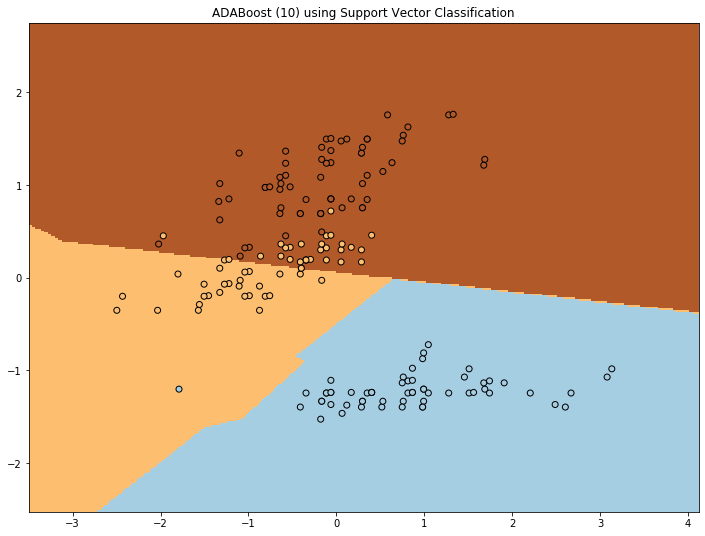

In [35]:
Z = clf3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig3 = plt.figure(figsize=(12, 9))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('ADABoost (10) using Support Vector Classification')
plt.axis('tight')
plt.show()

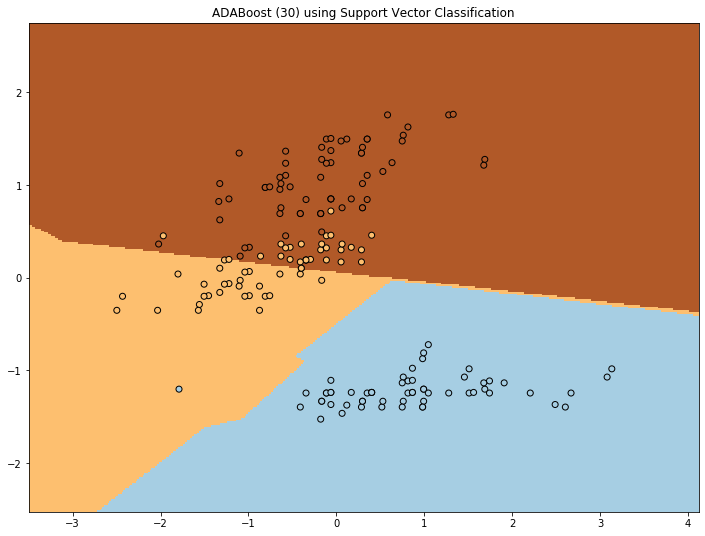

In [36]:
Z = clf4.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig4 = plt.figure(figsize=(12, 9))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('ADABoost (30) using Support Vector Classification')
plt.axis('tight')
plt.show()

## Save Results

In [37]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05'])
print(imagepath)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrial Machine Learning\book\GitHub\Upload\industrial-machine-learning\Results\Chapter 05


In [38]:
if not os.path.exists(imagepath):
    os.makedirs(imagepath)

In [39]:
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05','Chapter-005-Example-001C-01.jpg'])
fig1.savefig(imagename, bbox_inches='tight')

In [40]:
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05','Chapter-005-Example-001C-02.jpg'])
fig2.savefig(imagename, bbox_inches='tight')

In [41]:
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05','Chapter-005-Example-001C-03.jpg'])
fig3.savefig(imagename, bbox_inches='tight')

In [42]:
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05','Chapter-005-Example-001C-04.jpg'])
fig4.savefig(imagename, bbox_inches='tight')

## Done

In [43]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-10-19 17:42:07.279456
